In [ ]:
import pandas as pd

GSM5494555_col_0_1_count = pd.read_csv("GSM5494555_col-0-1_count.txt",
                                       sep="\t", index_col=0)

GSM5494556_col_0_1_2_count = pd.read_csv("GSM5494556_col-0-1-2_count.txt",
                                         sep="\t", index_col=0)

GSM5494557_col_0_m_count = pd.read_csv("GSM5494557_col-0-m_count.txt",
                                       sep="\t", index_col=0)

GSM5494558_col_0_m_2_count = pd.read_csv("GSM5494558_col-0-m-2_count.txt",
                                         sep="\t", index_col=0)

GSM5494559_men1_1_count = pd.read_csv("GSM5494559_men1-1_count.txt",
                                      sep="\t", index_col=0)

GSM5494560_men1_1_2_count = pd.read_csv("GSM5494560_men1-1-2_count.txt",
                                        sep="\t", index_col=0)

GSM5494561_men1_m_count = pd.read_csv("GSM5494561_men1-m_count.txt",
                                      sep="\t", index_col=0)

GSM5494562_men1_m_2_count = pd.read_csv("GSM5494562_men1-m-2_count.txt",
                                        sep="\t", index_col=0)


In [ ]:
import pandas as pd

# Combine replicates for each condition
col_0_1 = pd.concat([GSM5494555_col_0_1_count,
                     GSM5494556_col_0_1_2_count], axis=1)

col_0_m = pd.concat([GSM5494557_col_0_m_count,
                     GSM5494558_col_0_m_2_count], axis=1)

men1_1 = pd.concat([GSM5494559_men1_1_count,
                    GSM5494560_men1_1_2_count], axis=1)

men1_m = pd.concat([GSM5494561_men1_m_count,
                    GSM5494562_men1_m_2_count], axis=1)

# Combine the two col samples
col = pd.concat([col_0_1, col_0_m], axis=1)

# Combine the two men1 samples
men1 = pd.concat([men1_1, men1_m], axis=1)

# Final merged count matrix
data = pd.concat([col, men1], axis=1)


In [ ]:
data.sum(axis=0)

,0
col-0-1_sorted.bam,17880707.67
col-0-1-2_sorted.bam,17729378.96
col-0-m_sorted.bam,14547814.44
col-0-m-2_sorted.bam,15163016.52
men1-1_sorted.bam,12199568.29
men1-1-2_sorted.bam,13980145.24
men1-m_sorted.bam,13598803.86
men1-m-2_sorted.bam,14159069.47


In [ ]:
# Convert all values in the matrix to integers
datamat = data.astype(int)

# Reassign it back to data (already a DataFrame)
data = datamat.copy()

# Restore row names (index)
data.index = GSM5494555_col_0_1_count.index


In [ ]:
import numpy as np

# Copy the dataframe
data_wnames = data.copy()

# Add gene names as a column
data_wnames["gene"] = data.index

# Melt into long format
data_melt = data_wnames.melt(
    id_vars="gene",
    var_name="sample",
    value_name="count"
)


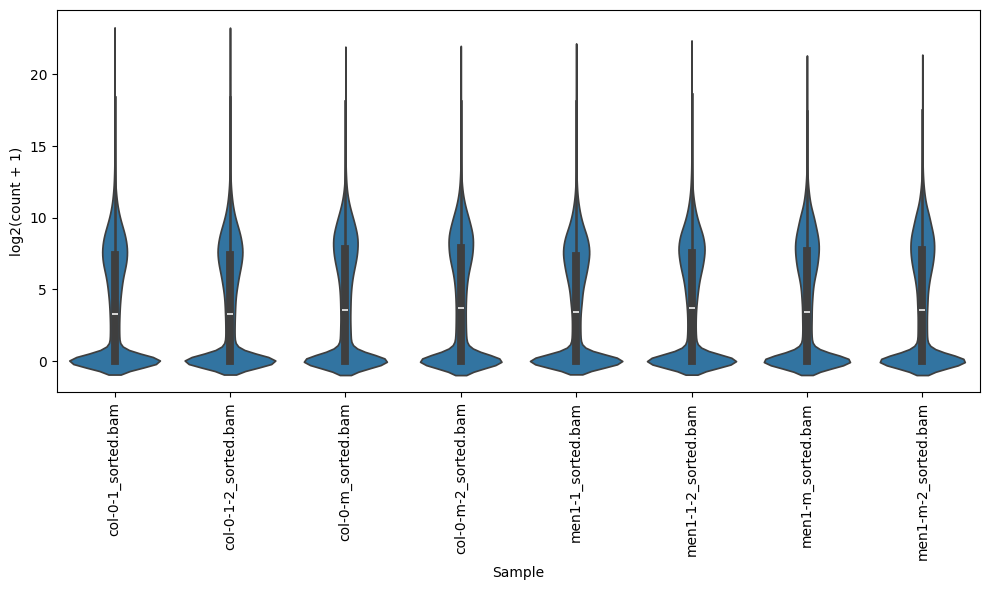

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create log2(count + 1) column
data_melt["log2_count"] = np.log2(data_melt["count"] + 1)

plt.figure(figsize=(10, 6))
sns.violinplot(data=data_melt, x="sample", y="log2_count")

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("log2(count + 1)")
plt.tight_layout()
plt.show()


In [ ]:
# Column names from the count matrix
column_names = data.columns.tolist()

# Metadata vectors
genotype = ["col","col","col","col","men","men","men","men"]
treatment = ["control","control","mms","mms","control","control","mms","mms"]

# Build the metadata dataframe
coldata = pd.DataFrame({
    "genotype": genotype,
    "treatment": treatment
}, index=column_names)
coldata

,genotype,treatment
col-0-1_sorted.bam,col,control
col-0-1-2_sorted.bam,col,control
col-0-m_sorted.bam,col,mms
col-0-m-2_sorted.bam,col,mms
men1-1_sorted.bam,men,control
men1-1-2_sorted.bam,men,control
men1-m_sorted.bam,men,mms
men1-m-2_sorted.bam,men,mms


In [ ]:
# Install pyDESeq2 (run in terminal or Jupyter)
!pip install pyDESeq2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 8.2 MB/s eta 0:00:00


In [15]:
from pydeseq2.dds import DeseqDataSet as pyDESeq2

# 1. Transpose data (Samples must be rows)
data_transposed = data.T

# 2. Use the 'design' argument with your R-style formula
dds = pyDESeq2(
    counts = data_transposed,
    metadata = coldata,
    design = "~ genotype + treatment + genotype:treatment", # Back to the formula!
    refit_cooks = True
)

In [17]:
# Run DESeq2 normalization and differential expression
# 1. Run the full DESeq2 pipeline (Estimation of size factors, dispersions, and GLM fitting)
dds.deseq2()

# 2. Inspect the dds object to see the results of the fit
print(dds)

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 22.99 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 29.57 seconds.

Fitting LFCs...


AnnData object with n_obs × n_vars = 8 × 37869
    obs: 'genotype', 'treatment', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'


... done in 22.32 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



In [21]:
# Option A: Look at the design matrix columns (stored in the 'obsm' slot)
print("Coefficient names from design matrix:")
print(dds.obsm['design_matrix'].columns.tolist())


Coefficient names from design matrix:
['Intercept', 'genotype[T.men]', 'treatment[T.mms]', 'genotype[T.men]:treatment[T.mms]']


In [25]:
import numpy as np
from pydeseq2.ds import DeseqStats

# 1. Main Effect: Genotype (Works fine as a list)
genotype_stats = DeseqStats(dds, contrast=["genotype", "men", "col"])
genotype_stats.summary()
genotype_res = genotype_stats.results_df

# 2. Main Effect: Treatment (Works fine as a list)
treatment_stats = DeseqStats(dds, contrast=["treatment", "mms", "control"])
treatment_stats.summary()
treatment_res = treatment_stats.results_df

# 3. Interaction Effect: MODIFIED to use a Contrast Vector
# Logic: [Intercept, Genotype, Treatment, Interaction]
# We use 1 for the 4th position to pull the interaction results
interaction_vector = np.array([0, 0, 0, 1])
interaction_stats = DeseqStats(dds, contrast=interaction_vector)
interaction_stats.summary()
interaction_res = interaction_stats.results_df

# View top 5 interaction genes
print("\nTop Interaction Genes (Genotype x Treatment):")
print(interaction_res.sort_values("padj").head())

Running Wald tests...
... done in 11.82 seconds.



Log2 fold change & Wald test p-value: genotype men vs col
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Geneid                                                                        
AT1G01010   109.857841        0.285559  0.233338  1.223803  0.221027  0.433502
AT1G01020   139.577595       -0.284742  0.203205 -1.401257  0.161137  0.350626
AT1G03987     0.958642        3.846576  5.182559  0.742216  0.457957       NaN
AT1G01030    30.875985       -0.214534  0.444393 -0.482757  0.629268  0.799100
AT1G01040  1019.385608       -0.135303  0.082206 -1.645898  0.099785  0.253283
...                ...             ...       ...       ...       ...       ...
ATMG01370     0.000000             NaN       NaN       NaN       NaN       NaN
ATMG01380     0.000000             NaN       NaN       NaN       NaN       NaN
ATMG01390     0.000000             NaN       NaN       NaN       NaN       NaN
ATMG01400     0.000000             NaN       NaN       NaN       NaN     

Running Wald tests...
... done in 10.12 seconds.



Log2 fold change & Wald test p-value: treatment mms vs control
              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                     
AT1G01010   109.857841       -0.182174  0.233880 -0.778920  4.360266e-01   
AT1G01020   139.577595        0.322570  0.190409  1.694092  9.024777e-02   
AT1G03987     0.958642        1.970467  5.246894  0.375549  7.072520e-01   
AT1G01030    30.875985       -0.295757  0.434179 -0.681187  4.957531e-01   
AT1G01040  1019.385608        0.652438  0.076611  8.516244  1.648116e-17   
...                ...             ...       ...       ...           ...   
ATMG01370     0.000000             NaN       NaN       NaN           NaN   
ATMG01380     0.000000             NaN       NaN       NaN           NaN   
ATMG01390     0.000000             NaN       NaN       NaN           NaN   
ATMG01400     0.000000             NaN       NaN       NaN           NaN   
ATMG01410     0.000000   

Running Wald tests...
... done in 7.70 seconds.



Log2 fold change & Wald test p-value, contrast vector: [0 0 0 1]
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Geneid                                                                        
AT1G01010   109.857841        0.152706  0.324811  0.470139  0.638256  0.779791
AT1G01020   139.577595       -0.398011  0.279203 -1.425523  0.154006  0.305015
AT1G03987     0.958642       -6.107158  7.374867 -0.828104  0.407611       NaN
AT1G01030    30.875985        0.693067  0.613021  1.130577  0.258233  0.438702
AT1G01040  1019.385608        0.034954  0.109508  0.319188  0.749584  0.854172
...                ...             ...       ...       ...       ...       ...
ATMG01370     0.000000             NaN       NaN       NaN       NaN       NaN
ATMG01380     0.000000             NaN       NaN       NaN       NaN       NaN
ATMG01390     0.000000             NaN       NaN       NaN       NaN       NaN
ATMG01400     0.000000             NaN       NaN       NaN       N

In [26]:
# Subset for adjusted p-value < 0.05 and log2 fold change > 1
sig_interaction = interaction_res[(interaction_res["padj"] < 0.05) &
                                  (interaction_res["log2FoldChange"] > 1)]

# Get the shape (number of genes, number of columns)
sig_interaction.shape


(1059, 6)

In [27]:
# Subset for adjusted p-value < 0.05 and log2 fold change < -1
sig_down_interaction = interaction_res[(interaction_res["padj"] < 0.05) &
                                       (interaction_res["log2FoldChange"] < -1)]

# Get the shape (number of genes, number of columns)
sig_down_interaction.shape


(710, 6)

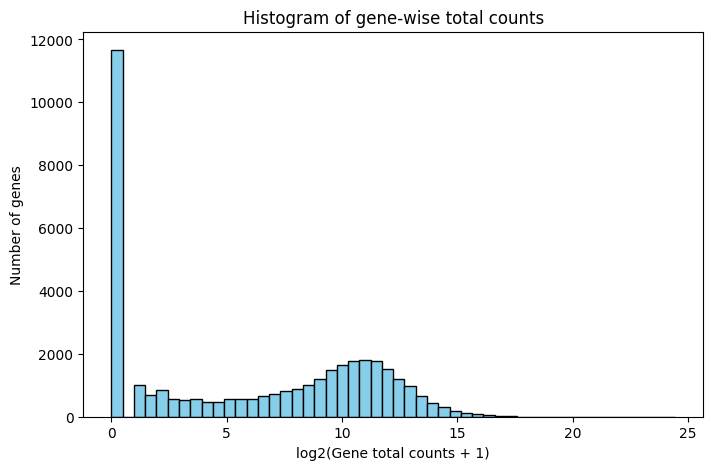

In [28]:
# Sum counts across all samples for each gene
genesum = data.sum(axis=1)

# Log2-transform
log2_genesum = np.log2(genesum + 1)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(log2_genesum, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('log2(Gene total counts + 1)')
plt.ylabel('Number of genes')
plt.title('Histogram of gene-wise total counts')
plt.show()

In [29]:
# Count number of genes with total count equal to 0
num_zero_genes = (genesum == 0).sum()
print(num_zero_genes)

11662


In [30]:
# Filter genes with total counts > 30
data_filt = data[genesum > 30].copy()


In [32]:
from pydeseq2.dds import DeseqDataSet

# 1. We use 'design' instead of 'design_factors'
# 2. We remove the '~' from the string (the library adds it automatically)
dds2 = DeseqDataSet(
    counts=data_filt.T,
    metadata=coldata,
    design="genotype + treatment + genotype:treatment",
    refit_cooks=True
)

print("dds2 object created successfully with filtered counts!")

dds2 object created successfully with filtered counts!


In [34]:
# Run DESeq2 normalization and differential expression on filtered dataset
dds2.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 19.42 seconds.

Fitting dispersion trend curve...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 25.66 seconds.

Fitting LFCs...
... done in 14.78 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



In [36]:
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np

# 1. Create the stats object using the filtered dds2
# Vector [0,0,0,1] specifically targets the interaction term
stat_res = DeseqStats(dds2, contrast=np.array([0, 0, 0, 1]))

# 2. Run the Wald test and get the results dataframe
stat_res.summary()
interaction_res2 = stat_res.results_df

# 3. Your subsetting code remains exactly the same
interaction_up = interaction_res2[(interaction_res2["padj"] < 0.05) &
                                  (interaction_res2["log2FoldChange"] > 1)]

interaction_down = interaction_res2[(interaction_res2["padj"] < 0.05) &
                                    (interaction_res2["log2FoldChange"] < -1)]

interaction_all = pd.concat([interaction_up, interaction_down])

# 4. View results
print(f"Total significant interaction genes after filtering: {interaction_all.shape[0]}")
# Subset upregulated genes (padj < 0.05 & log2FoldChange > 1)
interaction_up = interaction_res2[(interaction_res2["padj"] < 0.05) &
                                  (interaction_res2["log2FoldChange"] > 1)]

# Subset downregulated genes (padj < 0.05 & log2FoldChange < -1)
interaction_down = interaction_res2[(interaction_res2["padj"] < 0.05) &
                                    (interaction_res2["log2FoldChange"] < -1)]

# Combine up and downregulated genes
interaction_all = pd.concat([interaction_up, interaction_down])

# Get dimensions (number of genes, number of columns)
interaction_all.shape


Running Wald tests...


Log2 fold change & Wald test p-value, contrast vector: [0 0 0 1]
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Geneid                                                                        
AT1G01010   109.863195        0.152299  0.315910  0.482095  0.629738  0.771337
AT1G01020   139.589920       -0.398463  0.271868 -1.465651  0.142743  0.285932
AT1G01030    30.877887        0.692332  0.596544  1.160571  0.245816  0.420761
AT1G01040  1019.441886        0.034545  0.106618  0.324010  0.745930  0.850600
AT1G01050  1015.563316       -0.353839  0.104494 -3.386212  0.000709  0.003664
...                ...             ...       ...       ...       ...       ...
AT5G67600   476.028773        0.323792  0.146952  2.203389  0.027567  0.081130
AT5G67610   223.464481        0.543562  0.216005  2.516440  0.011855  0.040755
AT5G67620    25.978228       -0.276139  0.729056 -0.378763  0.704864  0.824140
AT5G67630   297.270779       -0.032231  0.209627 -0.153755  0.8778

... done in 4.65 seconds.



(1830, 6)

In [38]:
import pandas as pd

# 1. Access normalized counts from the layers attribute
# pydeseq2 automatically populates this after you run .deseq2()
# We transpose it (.T) so Gene IDs become the index (rows)
normalizedvalue = pd.DataFrame(
    dds2.layers['normed_counts'].T,
    index=dds2.var_names,
    columns=dds2.obs_names
)

# 2. Add gene names as a column for melting
normvalue_wname = normalizedvalue.copy()
normvalue_wname["gene"] = normvalue_wname.index

# 3. Melt into "Long Format" (Tidy Data)
# This is perfect for plotting with Seaborn or Plotly
norm_melt = normvalue_wname.melt(
    id_vars="gene",
    var_name="sample",
    value_name="normalized_count"
)

print("Normalized counts extracted and melted successfully!")
print(norm_melt.head())

Normalized counts extracted and melted successfully!
        gene              sample  normalized_count
0  AT1G01010  col-0-1_sorted.bam        118.024176
1  AT1G01020  col-0-1_sorted.bam        145.260524
2  AT1G01030  col-0-1_sorted.bam         32.910587
3  AT1G01040  col-0-1_sorted.bam        814.820752
4  AT1G01050  col-0-1_sorted.bam       1081.509996


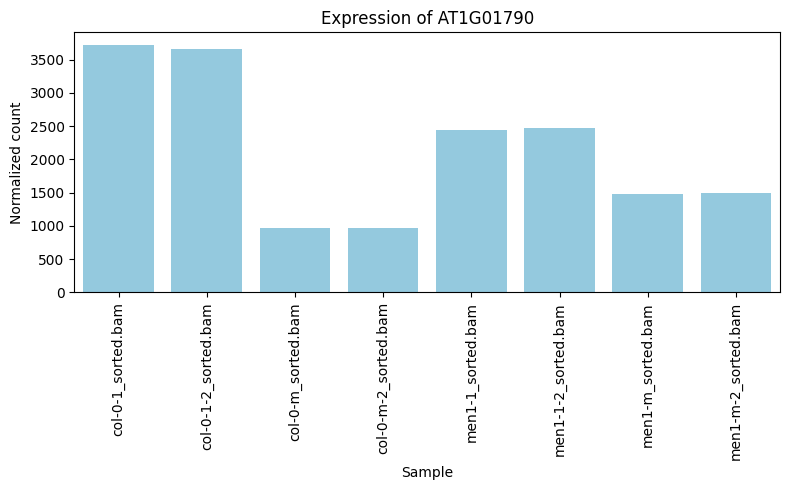

In [39]:
# Subset the gene of interest
gene2draw = norm_melt[norm_melt["gene"] == "AT1G01790"]

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=gene2draw, x="sample", y="normalized_count", color='skyblue')

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Normalized count")
plt.title("Expression of AT1G01790")
plt.tight_layout()
plt.show()

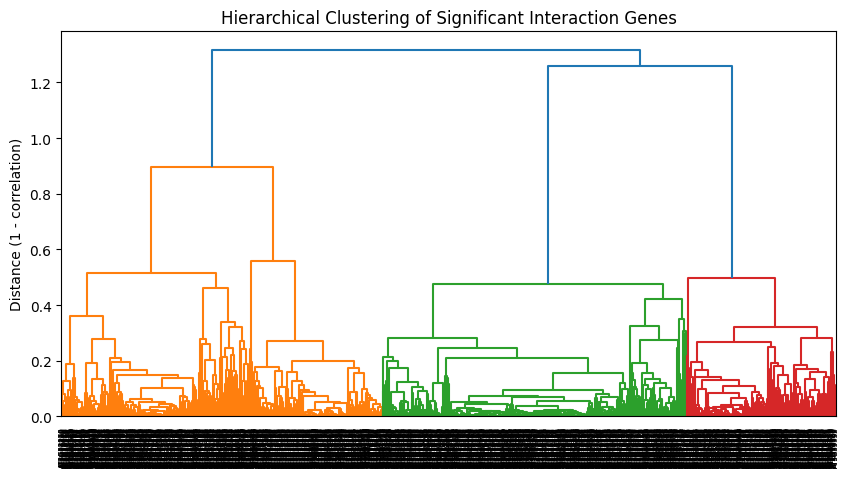

In [40]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Extract normalized counts for significant interaction genes
interaction_all_normvalues = normalizedvalue.loc[interaction_all.index]

# Transpose so that genes are columns for correlation across samples
corr_matrix = interaction_all_normvalues.T.corr()  # gene-gene correlation

# Convert correlation to distance
dist_matrix = 1 - corr_matrix

# Hierarchical clustering
linkage_matrix = linkage(squareform(dist_matrix), method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=interaction_all_normvalues.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Significant Interaction Genes")
plt.ylabel("Distance (1 - correlation)")
plt.show()


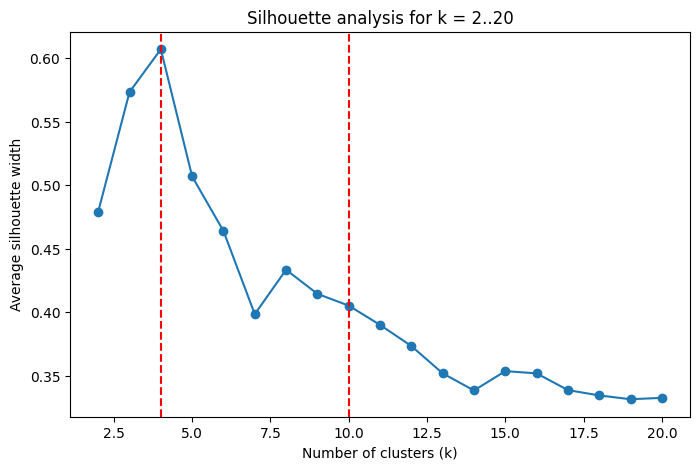

In [41]:
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Assuming `interaction_all_normvalues` is your gene x sample DataFrame

# 1. Compute distance matrix (1 - correlation)
dist_matrix = 1 - interaction_all_normvalues.T.corr()
dist_array = squareform(dist_matrix.values)  # convert to 1D for linkage

# 2. Hierarchical clustering
linkage_matrix = linkage(dist_array, method='average')

# 3. Compute average silhouette widths for k = 2 to 20
avg_sil_widths = []

# Convert correlation distance to a feature matrix for silhouette_score
# silhouette_score expects samples x features, so transpose
feature_matrix = interaction_all_normvalues.values

for k in range(2, 21):
    # Assign cluster labels using fcluster
    cluster_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Compute silhouette score
    sil_score = silhouette_score(feature_matrix, cluster_labels, metric='correlation')
    avg_sil_widths.append(sil_score)

# 4. Plot average silhouette widths
plt.figure(figsize=(8,5))
plt.plot(range(2,21), avg_sil_widths, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average silhouette width")
plt.title("Silhouette analysis for k = 2..20")
plt.axvline(x=4, color='red', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')
plt.show()


In [42]:
from scipy.cluster.hierarchy import fcluster

# Cut the hierarchical clustering into 4 clusters
interact_sig_hclust_4 = fcluster(linkage_matrix, 4, criterion='maxclust')

# Show the first few cluster assignments
print(interact_sig_hclust_4[:10])


[3 3 3 2 3 2 3 3 3 2]


In [43]:
# Convert cluster labels to a pandas Series with gene names as index
cluster_labels = pd.Series(interact_sig_hclust_4, index=interaction_all_normvalues.index)

# Subset normalized counts by cluster
interact_sig_hclust_g1 = normalizedvalue.loc[cluster_labels[cluster_labels == 1].index]
interact_sig_hclust_g2 = normalizedvalue.loc[cluster_labels[cluster_labels == 2].index]
interact_sig_hclust_g3 = normalizedvalue.loc[cluster_labels[cluster_labels == 3].index]
interact_sig_hclust_g4 = normalizedvalue.loc[cluster_labels[cluster_labels == 4].index]


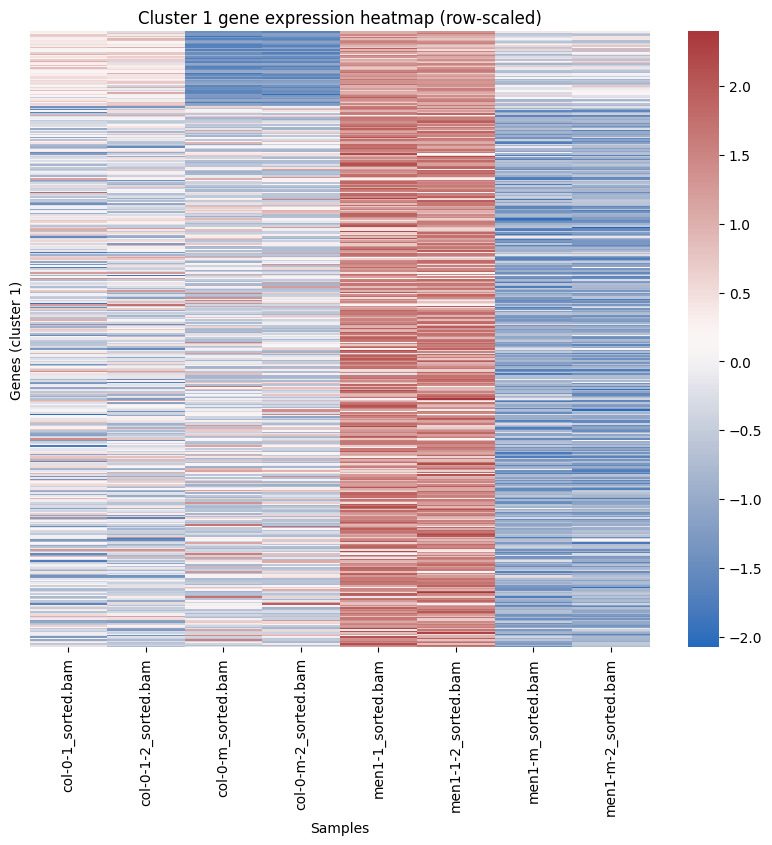

In [44]:
from sklearn.preprocessing import StandardScaler

# 1. Extract normalized counts for cluster 1
data_cluster1 = interact_sig_hclust_g1.copy()

# 2. Scale by row (gene)
scaler = StandardScaler(with_mean=True, with_std=True)
data_scaled = pd.DataFrame(
    scaler.fit_transform(data_cluster1.T).T,  # scale rows
    index=data_cluster1.index,
    columns=data_cluster1.columns
)

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    data_scaled,
    cmap='vlag',          # diverging color map like pheatmap
    yticklabels=False,    # hide gene names
    xticklabels=True
)
plt.xlabel("Samples")
plt.ylabel("Genes (cluster 1)")
plt.title("Cluster 1 gene expression heatmap (row-scaled)")
plt.show()


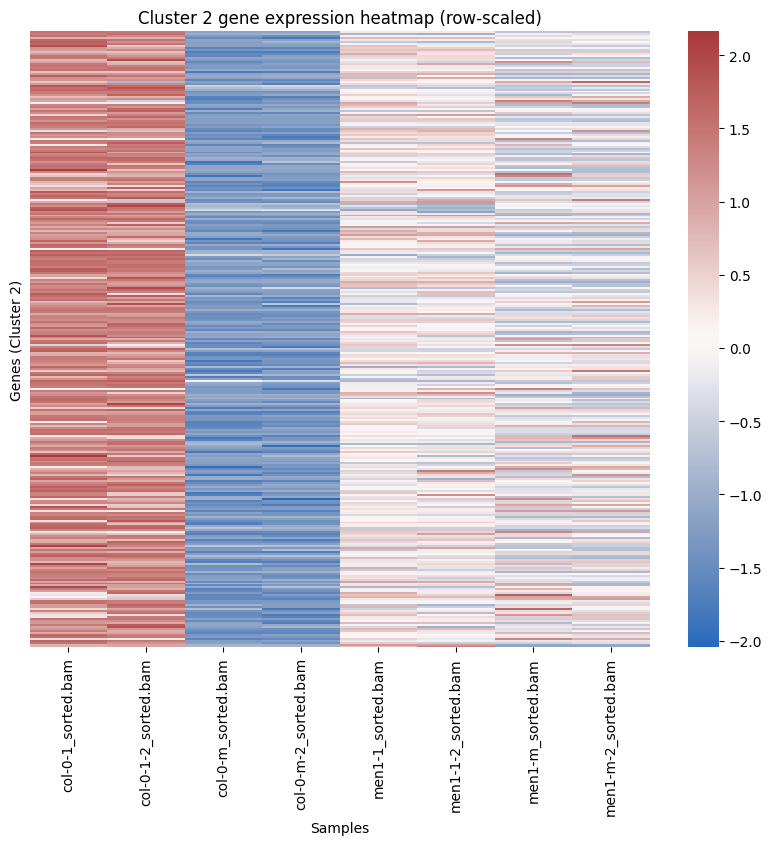

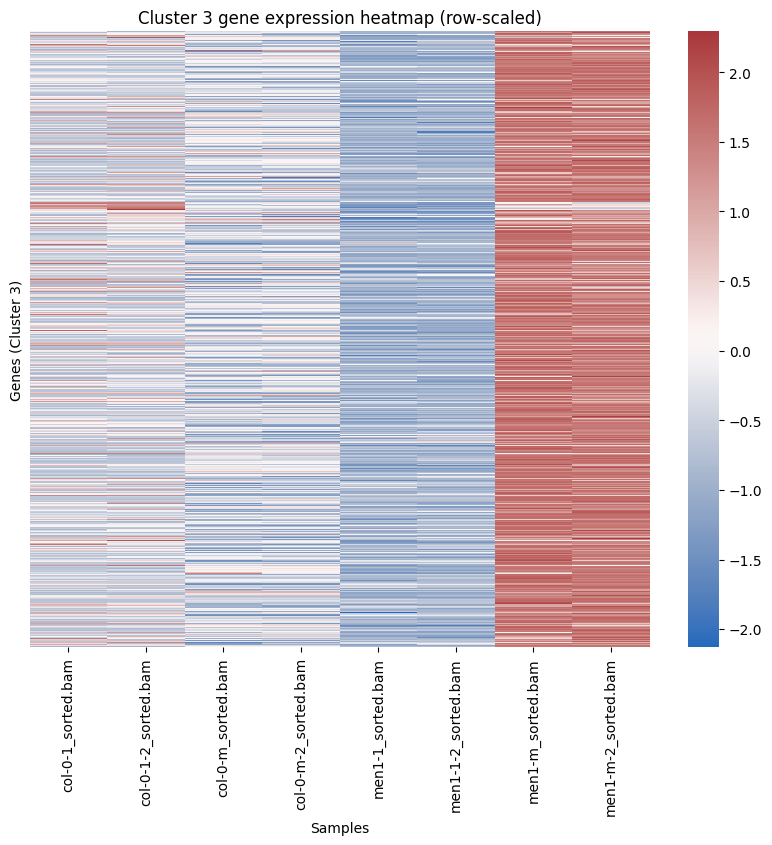

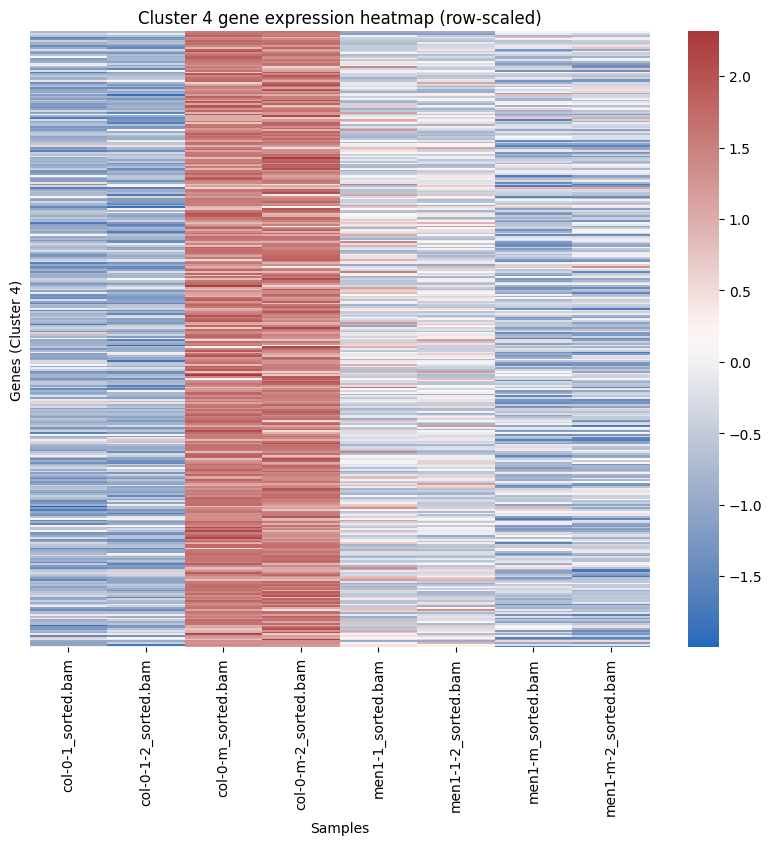

In [45]:
def plot_cluster_heatmap(cluster_df, cluster_name, coldata=None):
    # Scale by row (gene)
    scaler = StandardScaler(with_mean=True, with_std=True)
    data_scaled = pd.DataFrame(
        scaler.fit_transform(cluster_df.T).T,
        index=cluster_df.index,
        columns=cluster_df.columns
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        data_scaled,
        cmap='vlag',       # diverging color map like pheatmap
        yticklabels=False, # hide gene names
        xticklabels=True
    )
    plt.xlabel("Samples")
    plt.ylabel(f"Genes ({cluster_name})")
    plt.title(f"{cluster_name} gene expression heatmap (row-scaled)")
    plt.show()

# Plot heatmaps for clusters 2, 3, 4
plot_cluster_heatmap(interact_sig_hclust_g2, "Cluster 2")
plot_cluster_heatmap(interact_sig_hclust_g3, "Cluster 3")
plot_cluster_heatmap(interact_sig_hclust_g4, "Cluster 4")
